# Zurückweisung

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import sympy

In [2]:
mu1 = 0.0
mu2 = 2.0
var1 = 0.5
var2 = 0.25

## Plot

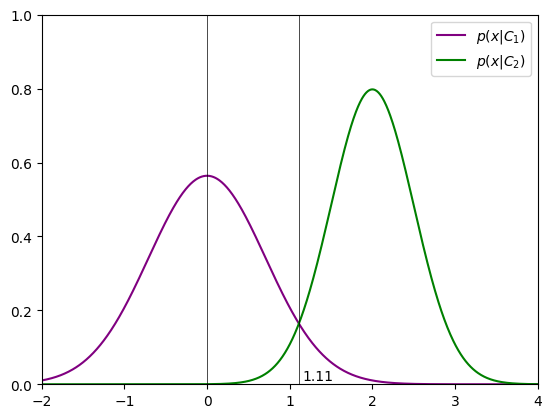

In [3]:
def plot_base_p_x_Ci(lower_border: int, upper_border: int):
    x_plot = np.linspace(lower_border, upper_border, 1000)

    plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='purple', label='$p(x|C_1)$')
    plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='green', label='$p(x|C_2)$')
    
    plt.axvline(x=0, color='black', linewidth=0.5)

plot_base_p_x_Ci(-2, 4)
plt.axvline(x=1.11, color='black', linewidth=0.5)
plt.annotate(f'1.11', xy=(1.15,0.01))

plt.axis([-2, 4, 0, 1])
plt.legend()
plt.show()

## Zurückweisungsgrenzen

In [4]:
threshold = 0.8

p_C1 = 0.5
p_C2 = 0.5

### $R_1$

In [5]:
a = (1 / (2 * var2)) - (1 / (2 * var1))
b = (2 * mu1 / (2 * var1)) - (2 * mu2 / (2 * var2))
c = (mu2**2 / (2 * var2)) - (mu1**2 / (2 * var1))
z = sympy.ln((1 / threshold - 1) * (p_C2 / p_C1) * sympy.sqrt(var2 / var1))

In [6]:
x = sympy.Symbol('x')

lhs = a * x**2 + b * x + c + z
eqn = sympy.Eq(lhs, 0)

borders_R1 = list(sympy.solveset(eqn))
print('Grenzen R1:', borders_R1)

Grenzen R1: [0.880245530270072, 7.11975446972993]


### $R_2$

In [7]:
a = (1 / (2 * var1)) - (1 / (2 * var2))
b = (2 * mu2 / (2 * var2)) - (2 * mu1 / (2 * var1))
c = (mu1**2 / (2 * var1)) - (mu2**2 / (2 * var2))
z = sympy.ln((1 / threshold - 1) * (p_C1 / p_C2) * sympy.sqrt(var1 / var2))
x = sympy.Symbol('x')

lhs = a * x**2 + b * x + c + z
eqn = sympy.Eq(lhs, 0)

borders_R2 = list(sympy.solveset(eqn))
print('Grenzen R2:', borders_R2)

Grenzen R2: [1.36176588810620, 6.63823411189380]


### Plot

In [10]:
def p_x_C1(x: float):
    return 1 / np.sqrt(2 * np.pi * var1) * np.exp(-1/2 * (x - mu1) ** 2 / var1)

def p_x_C2(x: float):
    return 1 / np.sqrt(2 * np.pi * var2) * np.exp(-1/2 * (x - mu2) ** 2 / var2)

def p(x: float):
    return p_x_C1(x) * p_C1 + p_x_C2(x) * p_C2

def p_C1_x(x: float):
    return p_x_C1(x) * p_C1 / p(x)

def p_C2_x(x: float):
    return p_x_C2(x) * p_C2 / p(x)

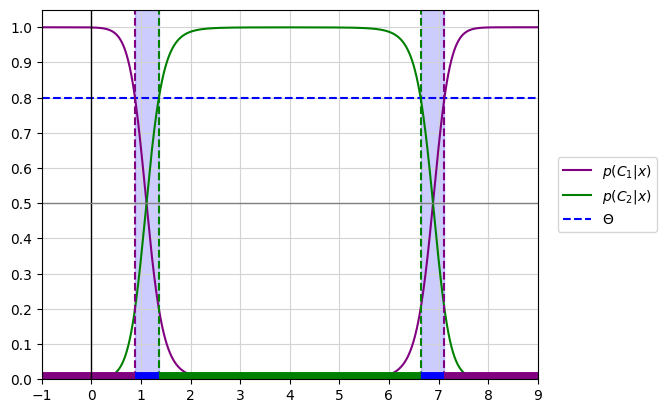

In [11]:
lower_bound = -1
upper_bound = 9

x_plot = np.linspace(lower_bound, upper_bound, 1000)

plt.plot(x_plot, p_C1_x(x_plot), color='purple', label='$p(C_1|x)$')
plt.plot(x_plot, p_C2_x(x_plot), color='green', label='$p(C_2|x)$')

plt.axhline(y=threshold, color='blue', linestyle='--', linewidth=1.5, label=r'$\Theta$')

plt.axvline(x=borders_R1[0], color='purple', linestyle='--')
plt.axvline(x=borders_R1[1], color='purple', linestyle='--')
plt.hlines(y=0, xmin=lower_bound, xmax=borders_R1[0], color='purple', linewidth=10)
plt.hlines(y=0, xmin=borders_R1[1], xmax=upper_bound, color='purple', linewidth=10)

plt.axvline(x=borders_R2[0], color='green', linestyle='--')
plt.axvline(x=borders_R2[1], color='green', linestyle='--')
plt.hlines(y=0, xmin=borders_R2[1], xmax=borders_R2[0], color='green', linewidth=10)

plt.hlines(y=0, xmin=borders_R1[0], xmax=borders_R2[0], color='blue', linewidth=10)
plt.hlines(y=0, xmin=borders_R1[1], xmax=borders_R2[1], color='blue', linewidth=10)

plt.axvspan(borders_R1[0], borders_R2[0], alpha=0.2, color='blue')
plt.axvspan(borders_R1[1], borders_R2[1], alpha=0.2, color='blue')

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

plt.yticks(np.linspace(0.0, 1.0, 10+1))
plt.xticks(np.linspace(lower_bound, upper_bound, upper_bound - lower_bound + 1))
plt.grid(which='both', color='lightgrey')

plt.axis([lower_bound, upper_bound, 0, 1.05])
plt.axvline(x=0, color='black', linewidth=1)
plt.axhline(y=1/2, color='gray', linewidth=1)

plt.show()